In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data File Loading

In [2]:
# Load Data file
data_original = pd.read_csv('bank_marketing.csv')

# Print the first 5 rows of the train-set
data_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Check the Data types and null-values if any
# There are no null values in any of the variables
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [4]:
# Create a new column named 'y_numeric' wherein we store numeric values of y-labels (target variable); 
# 1 for 'yes' and 0 for 'no'
data_original['y_numeric'] = np.where(data_original.y == 'yes', 1,0)

In [5]:
# Describe gives statistical information about numerical columns in the dataset
# The difference between Mean & Median is pretty high for 'balance', 'duration' and 'pdays' which indicate presence of Outliers 
data_original.describe()

,age,balance,day,duration,campaign,pdays,previous,y_numeric
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


## Missing Values Imputation

The dataset is devoid of any missing values. However, there are several observations with label 'unknown' in columns **Poutcome** and **Contact**. We do not convert these to any other label before we study each of these features in greater depth.

## Data Visualization

### Visualizing Continuous Variables

Before we take a look at the distribution of each of the continuous, numeric variable, let's first see the correlation between each of them.

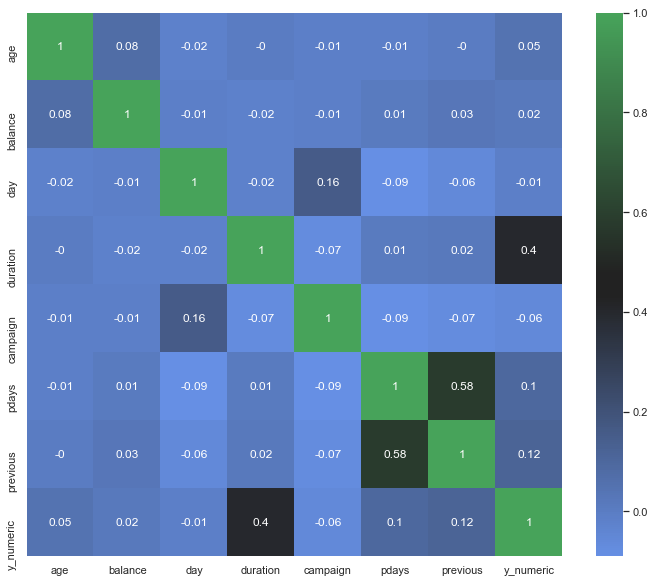

In [6]:
# Correlation Map
corr = data_original.corr()
sns.set(rc={'figure.figsize':(12,10)})
fig,ax = plt.subplots()
cmap = sns.diverging_palette(255, 133, l=60, n=7, center='dark' , as_cmap = True)
sns.heatmap(np.round(corr, 2), cmap = cmap, annot=True, annot_kws = {'fontsize':12})

**After looking at the correlation numbers, it's evident that *Last Call Duration* seems to be fairly correlated to our target variable, which means more the time spent on the last call during the marketing campaign the better are the chances of that customer subscribing for long-term deposit account.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF3571D940>,
      dtype=object)

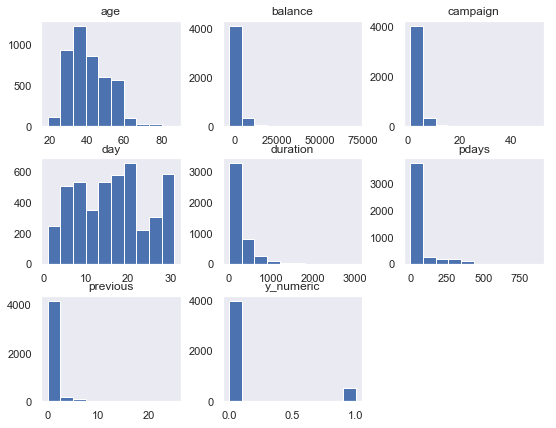

In [7]:
# Visualize the distribution of different continuous variables
data_original.hist(bins=10,figsize=(9,7),grid=False)

**We can see that most variables (all except 'age' and 'day') have their values skewed to one region.**

#### Let's visualize each of these continuous variables in greater depth. 
#### Let's start with 'balance', 'duration' and 'pdays' which indicate presence of Outliers.

##### 1. Visualizing 'Balance'

Mean balance of Non-Subscribed customers is 1403.21
Mean balance of Subscribed customers is 1571.96


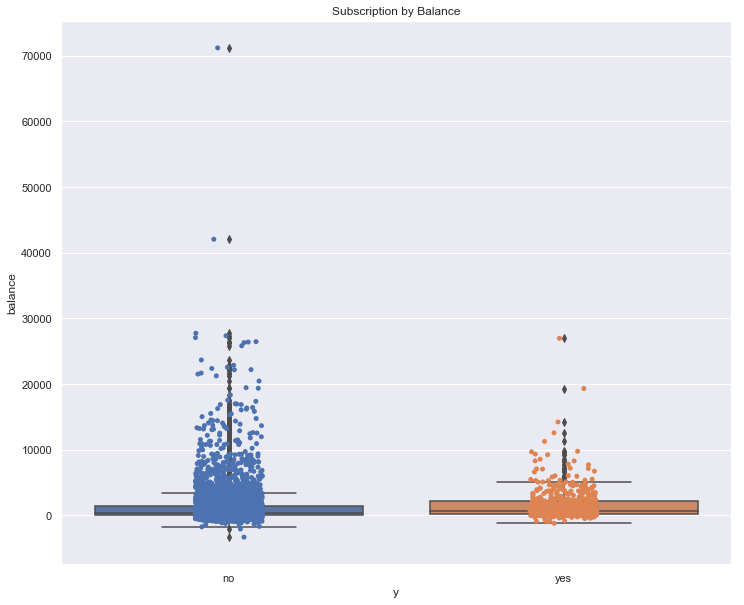

In [8]:
ax = sns.boxplot(x='y', y='balance', data=data_original)

ax = sns.stripplot(x='y', y='balance', data=data_original, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(data_original.balance[data_original.y == 'no'].mean(),2))
print('Mean balance of Subscribed customers is',np.round(data_original.balance[data_original.y == 'yes'].mean(),2))

**Let's check these outliers in detail**

In [9]:
data_original[data_original.balance > 30000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_numeric
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no,0
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,0


**Both of these individuals did not subscribe to long-term deposits and have other atttributes such as 'y', 'pdays', 'previous', 'poutcome', 'marital status' same as about half other customers. So we can safely remove them from our 'balance' analysis.**

In [10]:
outlier_balance_index = data_original[data_original.balance > 30000].index
data_without_outlier_balance = data_original.drop(data_original.index[outlier_balance_index])

Mean balance of Non-Subscribed customers is 1375.59
Mean balance of Subscribed customers is 1571.96


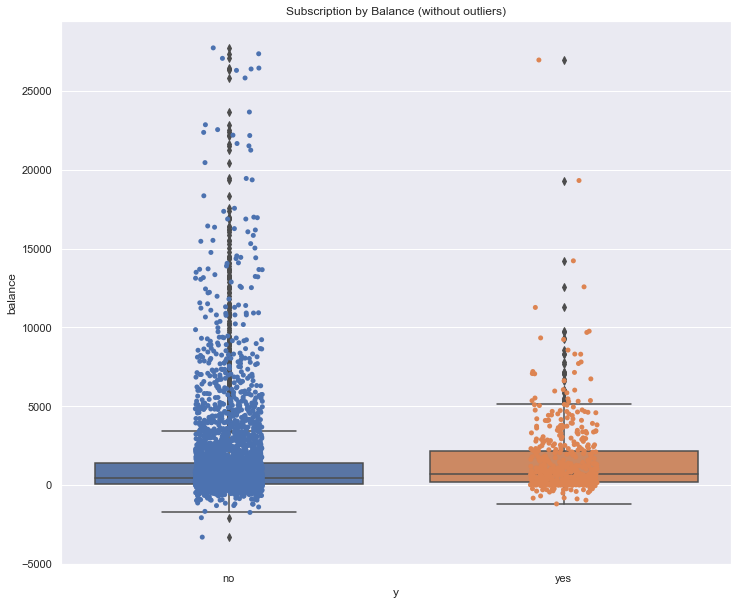

In [11]:
# let's visualize 'Balance' again

ax = sns.boxplot(x='y', y='balance', data=data_without_outlier_balance)

ax = sns.stripplot(x='y', y='balance', data=data_without_outlier_balance, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance (without outliers)',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(data_without_outlier_balance.balance[data_without_outlier_balance.y == 'no'].mean(),2))
print('Mean balance of Subscribed customers is',np.round(data_without_outlier_balance.balance[data_without_outlier_balance.y == 'yes'].mean(),2))

Mean balance of Non-Subscribed customers is 771.52
Mean balance of Subscribed customers is 1104.29


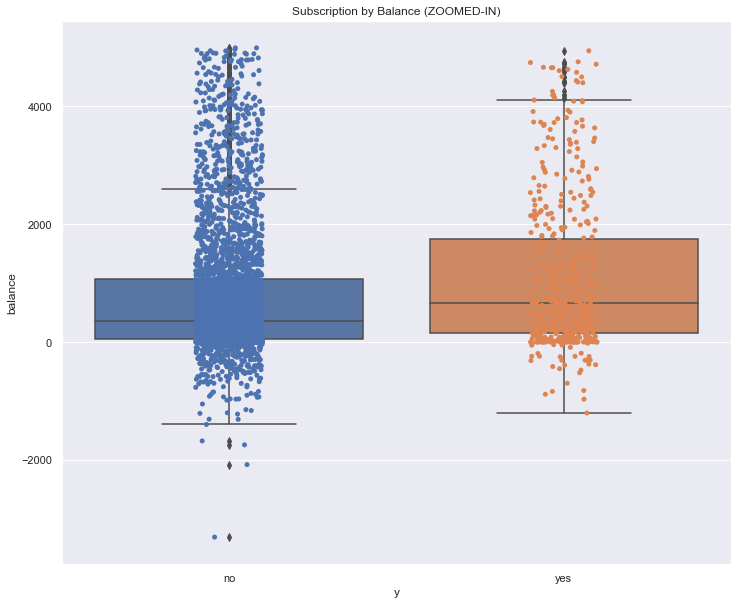

In [12]:
# Let's ZOOM-IN on our boxplots

zoomed_in_balance_index = data_original[data_original.balance > 5000].index
zoomed_in_balance_data = data_original.drop(data_original.index[zoomed_in_balance_index])

ax = sns.boxplot(x='y', y='balance', data=zoomed_in_balance_data)

ax = sns.stripplot(x='y', y='balance', data=zoomed_in_balance_data, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance (ZOOMED-IN)',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(zoomed_in_balance_data.balance[zoomed_in_balance_data.y == 'no'].mean(),2))
print('Mean balance of Subscribed customers is',np.round(zoomed_in_balance_data.balance[zoomed_in_balance_data.y == 'yes'].mean(),2))

**We can clearly see that the average account balance of the customers who subscribed to long-term deposits is HIGHER than those who didn't subscribe.**

##### 2. Visualizing 'Duration'

Mean Last Call Duration of Non-Subscribed customers is 226.35
Mean Last Call Duration of Subscribed customers is 552.74


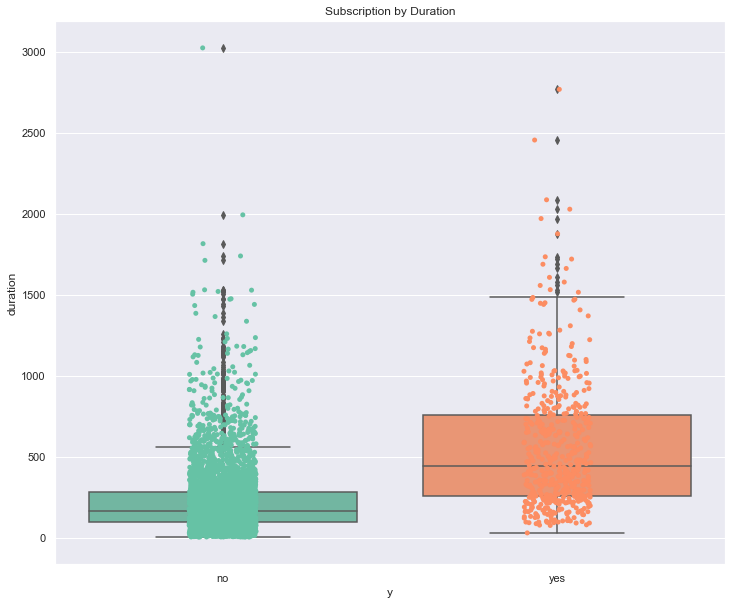

In [13]:
ax = sns.boxplot(x='y', y='duration', data=data_original, palette='Set2')

ax = sns.stripplot(x='y', y='duration', data=data_original, jitter=True, edgecolor='gray', palette='Set2')

ax.set_title('Subscription by Duration',fontsize=12)

print('Mean Last Call Duration of Non-Subscribed customers is', np.round(data_original.duration[data_original.y == 'no'].mean(),2))
print('Mean Last Call Duration of Subscribed customers is',np.round(data_original.duration[data_original.y == 'yes'].mean(),2))

**It's quite evident that the average Last Call Duration for Subscribers is more than double that of Non-subscribers.** <br/>
However there're some outliers among non-subscribers, let's take a closer look at these and see if we can remove it from our analysis.

In [14]:
data_original[data_original.duration > 2000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_numeric
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no,0
980,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes,1
3673,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes,1
3853,54,technician,married,secondary,no,-315,no,yes,cellular,10,jul,2029,1,-1,0,unknown,yes,1
4123,47,blue-collar,divorced,primary,no,126,yes,no,unknown,3,jun,2456,2,-1,0,unknown,yes,1


**4 out of these 5 individuals have Subscribed to long-term deposits, all of them were never contacted before. Let's see how our duration data looks after we take them out of our data.**

In [15]:
outlier_duration_index = data_original[data_original.duration > 2000].index
data_without_outlier_duration = data_original.drop(data_original.index[outlier_duration_index])

Mean Last Call Duration of Non-Subscribed customers is 225.65
Mean Last Call Duration of Subscribed customers is 538.95


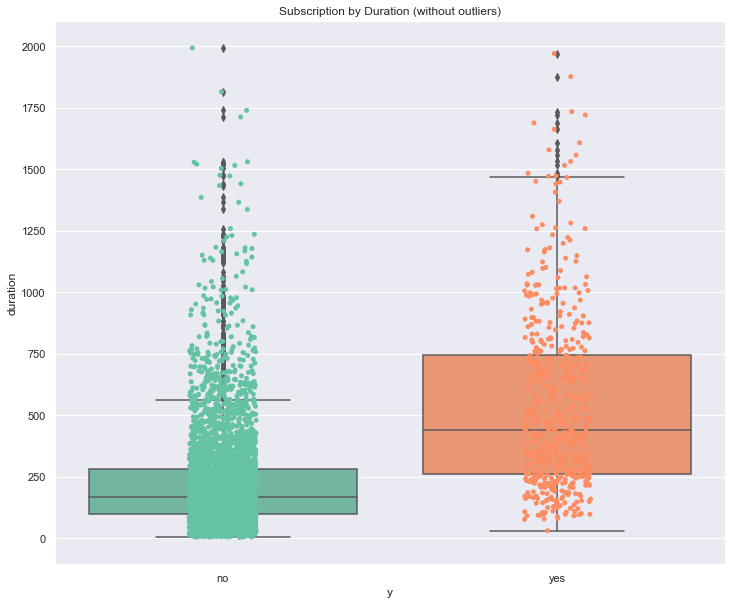

In [16]:
# let's visualize 'Duration' again

ax = sns.boxplot(x='y', y='duration', data=data_without_outlier_duration, palette='Set2')

ax = sns.stripplot(x='y', y='duration', data=data_without_outlier_duration, jitter=True, edgecolor='gray', palette='Set2')

ax.set_title('Subscription by Duration (without outliers)',fontsize=12)

print('Mean Last Call Duration of Non-Subscribed customers is', np.round(data_without_outlier_duration.duration[data_without_outlier_duration.y == 'no'].mean(),2))
print('Mean Last Call Duration of Subscribed customers is',np.round(data_without_outlier_duration.duration[data_without_outlier_duration.y == 'yes'].mean(),2))

**The result is still pretty much the same. This shows a very important point of distinction between the customers who subscribed to long-term deposits and customers who didn't, i.e. duration of last call in this campaign was *MORE THAN DOUBLE* for subscribers.**

##### 3. Visualizing 'Pdays'

Boxplot may not be the best plot to visualize pdays data because 'pdays' value is -1 for all those customers who were never contacted before this campaign.

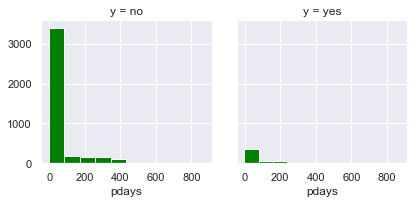

In [17]:
g = sns.FacetGrid(data_original, col='y', margin_titles=True)
g.map(plt.hist, 'pdays',color='green')

In [18]:
# Let's check what percentage of all observations among both subscribers and non-subscribers have pdays = -1

print('Total percent of non-subscribers who have pdays = -1: ', ((data_original[(data_original.pdays == -1) & (data_original.y == 'no')].y.count())/(data_original[data_original.y == 'no'].y.count()))*100)
print('Total percent of subscribers who have pdays = -1: ', ((data_original[(data_original.pdays == -1) & (data_original.y == 'yes')].y.count())/(data_original[data_original.y == 'yes'].y.count()))*100)

Total percent of non-subscribers who have pdays = -1:  84.2
Total percent of subscribers who have pdays = -1:  64.68330134357005


**About 65% of all subscribers had never been contacted before. <br/>
About 84% of all non-subscribers had never been contacted before.** <br/>
Thus a majority of all customers had never been contacted before.

Mean pdays for non-subscribers who were contacted atleast once:  233.22
Mean pdays for subscribers who were contacted atleast once:  196.18


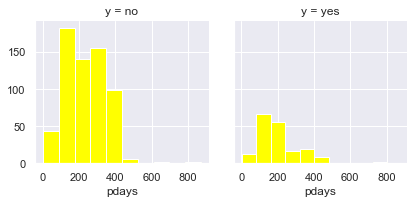

In [19]:
# Let's analyse all the remaining customers and visualize the distribution of their pdays

contacted_atleast_once = data_original[data_original.pdays != -1]

g = sns.FacetGrid(contacted_atleast_once, col='y', margin_titles=True, legend_out=True)
g.map(plt.hist, 'pdays',color='yellow')

print('Mean pdays for non-subscribers who were contacted atleast once: ', np.round(contacted_atleast_once.pdays[contacted_atleast_once.y == 'no'].mean(), 2))     
print('Mean pdays for subscribers who were contacted atleast once: ', np.round(contacted_atleast_once.pdays[contacted_atleast_once.y == 'yes'].mean(), 2))

This simply reinforces our intuition that the longer we stay out of touch with our customers the more are the chances of them not subscribing to our new services.

#### Let's visualize the other continuous variables (Age, Campaign, Previous) for both classes Subscribers and Non-subscribers

##### 4.Visualizing 'Age'

Mean Age of Non-Subscribed customers is 41.0
Mean Age of Subscribed customers is 42.49


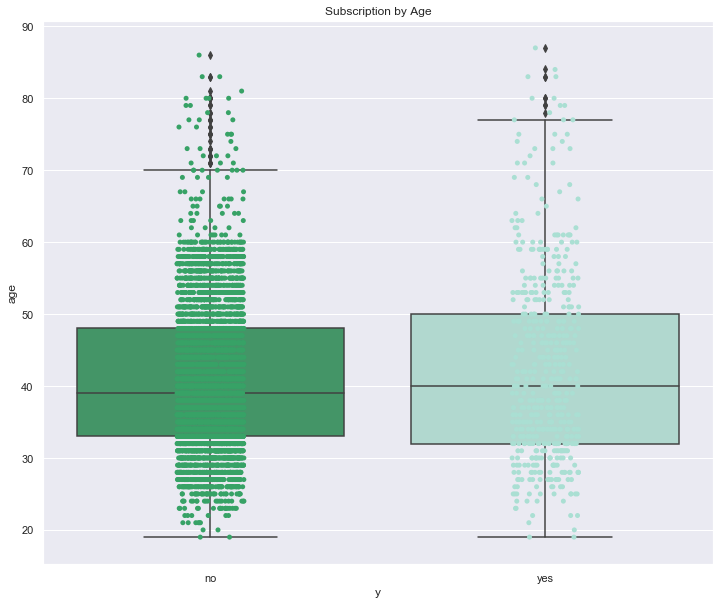

In [20]:
ax = sns.boxplot(x='y', y='age', data=data_original, palette='BuGn_r')

ax = sns.stripplot(x='y', y='age', data=data_original, jitter=True, edgecolor='gray', palette='BuGn_r')

ax.set_title('Subscription by Age',fontsize=12)

print('Mean Age of Non-Subscribed customers is', np.round(data_original.age[data_original.y == 'no'].mean(),2))
print('Mean Age of Subscribed customers is',np.round(data_original.age[data_original.y == 'yes'].mean(),2))

**The average age for subscribers is slightly GREATER than that for non-subscribers.**

##### 5. Visualising 'Campaign'

For about **67%** of all customers, total contacts made during this campaign were **NOT MORE THAN 2**.

If we break this among subscribers and non-subscribers:

In [21]:
print('Percentage among non-subscribers: ', ((data_original[(data_original.y == 'no') & (data_original.campaign <= 2)].age.count())/(data_original[data_original.y == 'no'].age.count()))*100)
print('Percentage among subscribers: ', ((data_original[(data_original.y == 'yes') & (data_original.campaign <= 2)].age.count())/(data_original[data_original.y == 'yes'].age.count()))*100)     

Percentage among non-subscribers:  65.5
Percentage among subscribers:  72.552783109405


**Over 72% of Subscribers were contacted NOT MORE THAN TWICE during the campaign.**

##### 6. Visualizing 'Previous'

For about 82% of all customers, **NO** contacts were made prior to this campaign.

If we break this among subscribers and non-subscribers:

In [22]:
print('Percentage among non-subscribers: ', ((data_original[(data_original.y == 'no') & (data_original.previous == 0)].age.count())/(data_original[data_original.y == 'no'].age.count()))*100)
print('Percentage among subscribers: ', ((data_original[(data_original.y == 'yes') & (data_original.previous == 0)].age.count())/(data_original[data_original.y == 'yes'].age.count()))*100)     

Percentage among non-subscribers:  84.2
Percentage among subscribers:  64.68330134357005


**About 65% of all subscribers had never been contacted before. <br/>
About 84% of all non-subscribers had never been contacted before.** <br/>
Thus a majority of all customers had never been contacted before. 

Mean # Prior Contacts for non-subscribers:  2.98
Mean # Prior Contacts for subscribers:  3.09


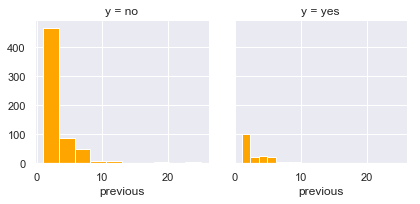

In [23]:
# Let's analyse all the remaining customers and visualize the distribution of the number of times 
# they were contacted prior to this campaign

contacted_atleast_once_prior = data_original[data_original.previous != 0]

g = sns.FacetGrid(contacted_atleast_once_prior, col='y', margin_titles=True, legend_out=True)
g.map(plt.hist, 'previous',color='orange')

print('Mean # Prior Contacts for non-subscribers: ', np.round(contacted_atleast_once_prior.previous[contacted_atleast_once_prior.y == 'no'].mean(), 2))     
print('Mean # Prior Contacts for subscribers: ', np.round(contacted_atleast_once_prior.previous[contacted_atleast_once_prior.y == 'yes'].mean(), 2))

From the above visualizations we can summarize that **Last Contact Duration ('duration')** and **Account Balance ('balance')** are the more important continuous features that determine the possibility of subscription.

##### 7. Visualising 'day'

Here, we visualize the ratio of Subscribers to Non-subscribers based on the day of last contact with customer 

First five days with highest subscription percent:
 1     37.04
10    28.00
24    22.22
22    18.60
12    18.54
Name: day, dtype: float64


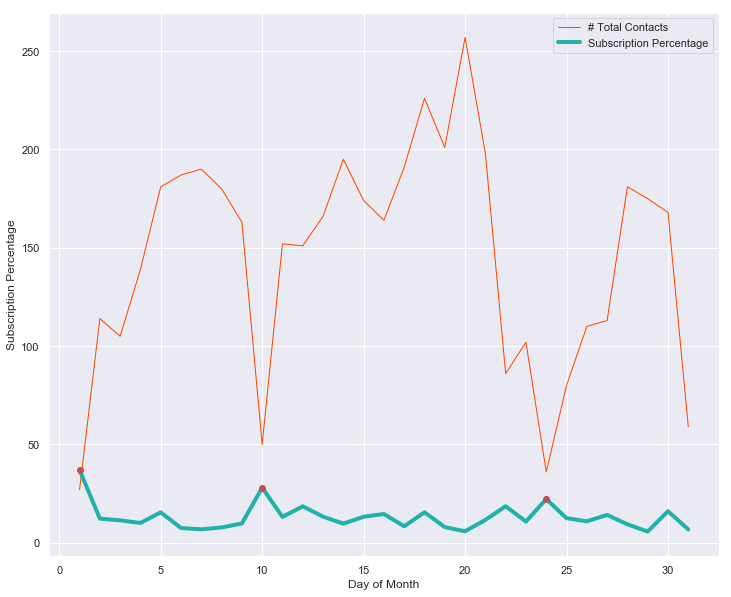

In [24]:
# Calculate day-wise total no. of contacts and day-wise total no. of subscriptions
daywise_contacts = data_original[data_original.y == 'yes'].day.value_counts() + data_original[data_original.y == 'no'].day.value_counts()
#daywise_subscriptions = data_original[data_original.y == 'yes'].day.value_counts()
daywise_subscription_percent = np.round(((data_original[data_original.y == 'yes'].day.value_counts())/(data_original[data_original.y == 'yes'].day.value_counts() + data_original[data_original.y == 'no'].day.value_counts()))*100, 2)
print('First five days with highest subscription percent:\n', daywise_subscription_percent.sort_values(ascending=False).head())

# Plot 'daywise_subscribers' and 'daywise_subscription_ratio' for different days of the month
sns.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(data=daywise_contacts, palette="tab10", linewidth=1, color='orangered', label='# Total Contacts')
#ax = sns.lineplot(data=daywise_subscriptions, palette="tab10", linewidth=2, color='darkviolet', label='# Total Subscriptions')
ax = sns.lineplot(data=daywise_subscription_percent, palette="tab10", linewidth=4, color='lightseagreen', label='Subscription Percentage')
ax.set(xlabel='Day of Month', ylabel='Subscription Percentage')
ax.legend(loc='best')

# Highlight the top 3 data points
ax.plot((1), (37.04), 'o', color='r')
ax.plot((10), (28.00), 'o', color='r')
ax.plot((24), (22.22), 'o', color='r')

**The total number of contacts made on the 3 days with the highest Subscription percentage (marked in red) are relatively low (LESS THAN OR EQUAL TO 50 contacts)** <br/>
**First day of the month seems like a good day for long-term deposit sales.**

##### 8. Visualizing 'month'

Here, we visualize the ratio of Subscribers to Non-subscribers based on the month of last contact with customer

First five months with highest subscription percent:
 oct    46.25
dec    45.00
mar    42.86
sep    32.69
apr    19.11
feb    17.12
aug    12.48
jan    10.81
jun    10.36
nov    10.03
jul     8.64
may     6.65
Name: month, dtype: float64


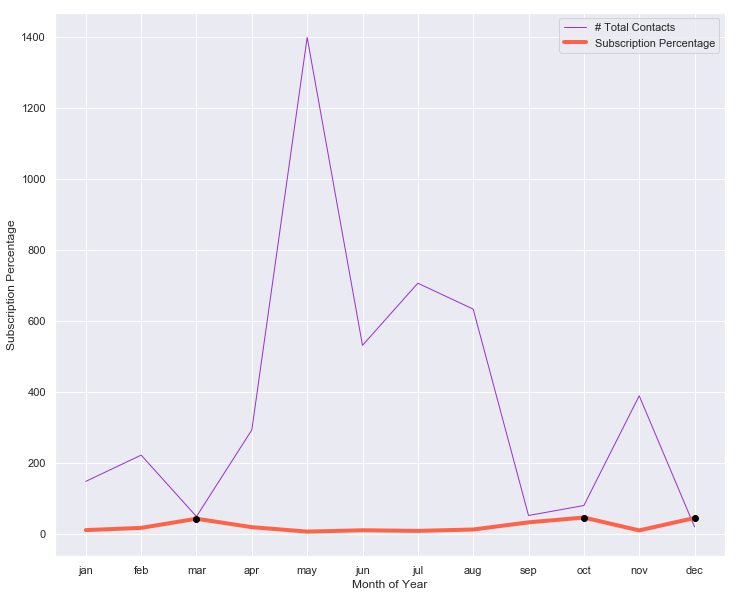

In [25]:
# Calculate month-wise total no. of contacts and month-wise total no. of subscriptions
monthwise_contacts = data_original[data_original.y == 'yes'].month.value_counts() + data_original[data_original.y == 'no'].month.value_counts()
#monthwise_subscriptions = data_original[data_original.y == 'yes'].month.value_counts()
monthwise_subscription_percent = np.round(((data_original[data_original.y == 'yes'].month.value_counts())/(data_original[data_original.y == 'yes'].month.value_counts() + data_original[data_original.y == 'no'].month.value_counts()))*100, 2)

# Sort the index of the above two series month-wise
monthwise_contacts.index = pd.CategoricalIndex(monthwise_contacts.index, 
                                               categories=['jan', 'feb', 'mar', 'apr','may','jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'], 
                                               )
monthwise_contacts = monthwise_contacts.sort_index()
#monthwise_subscriptions.index = pd.CategoricalIndex(monthwise_subscriptions.index, 
#                                                    categories=['jan', 'feb', 'mar', 'apr','may','jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'], 
#                                                   )
#monthwise_subscriptions = monthwise_subscriptions.sort_index()
monthwise_subscription_percent.index = pd.CategoricalIndex(monthwise_subscription_percent.index, 
                                                           categories=['jan', 'feb', 'mar', 'apr','may','jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'], 
                                                           )
monthwise_subscription_percent = monthwise_subscription_percent.sort_index()



print('First five months with highest subscription percent:\n', monthwise_subscription_percent.sort_values(ascending=False))

# Plot 'monthwise_subscribers' and 'monthwise_subscription_ratio' for different months of the year
sns.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(data=monthwise_contacts, palette="tab10", linewidth=1, color='darkorchid', label='# Total Contacts')
#ax = sns.lineplot(data=monthwise_subscriptions, palette="tab10", linewidth=2, color='green', label='# Total Subscriptions')
ax = sns.lineplot(data=monthwise_subscription_percent, palette="tab10", linewidth=4, color='tomato', label='Subscription Percentage')
ax.set(xlabel='Month of Year', ylabel='Subscription Percentage')
ax.legend(loc='best')

# Highlight the top 3 data points
ax.plot(('oct'), (46.25), 'o', color='black')
ax.plot(('dec'), (45.00), 'o', color='black')
ax.plot(('mar'), (42.86), 'o', color='black')

**Again, the top 3 months in terms of Subscription Percentage, October, December & March have Total Contacts less than 100. <br/> The bank could try to reach out to more customers in these months.** 

### Visualizing Discrete Variables

Let's visualize the distribution of Subscribers and Non-subscribers across different categorical variables.

##### 1. Visualizing 'Marital Status'

[Text(0.5, 1.0, 'Proportion of Subscribers across Marital Status')]

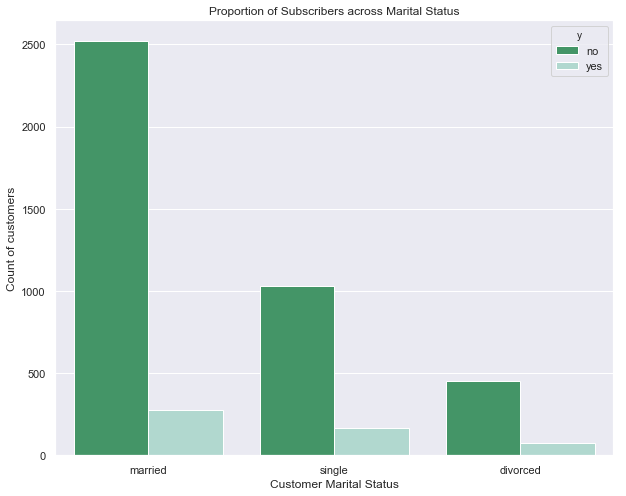

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='marital', hue='y', palette='BuGn_r', data=data_original)
ax.set(xlabel='Customer Marital Status', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across Marital Status')

**A large fraction of the customers are married, followed by 'single' customers. <br/>However, the proportion of Subscribers is fairly uniform across all.**

##### 2. Visualizing 'Educational Background'

[Text(0.5, 1.0, 'Proportion of Subscribers across Educational Background')]

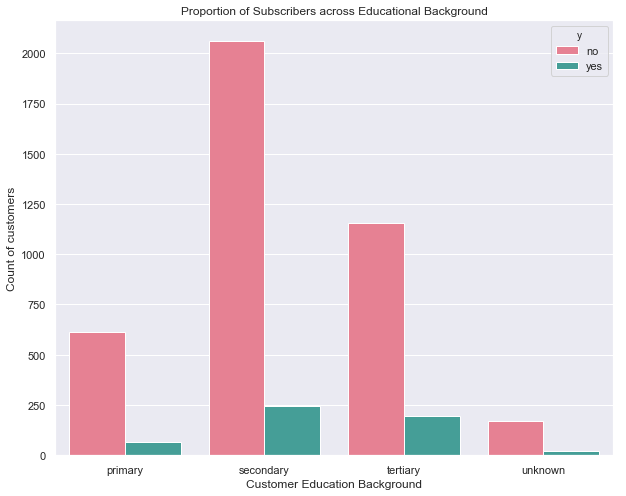

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='education', hue='y', palette='husl', data=data_original)
ax.set(xlabel='Customer Education Background', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across Educational Background')

**Customers with Secondary and Tertiary education comprise the bulk of the data. <br/>The distribution of subscribers is fairly uniform across these categories.**

##### 3. Visualizing 'Customer Profession'

[Text(0.5, 1.0, 'Proportion of Subscribers across customer profession')]

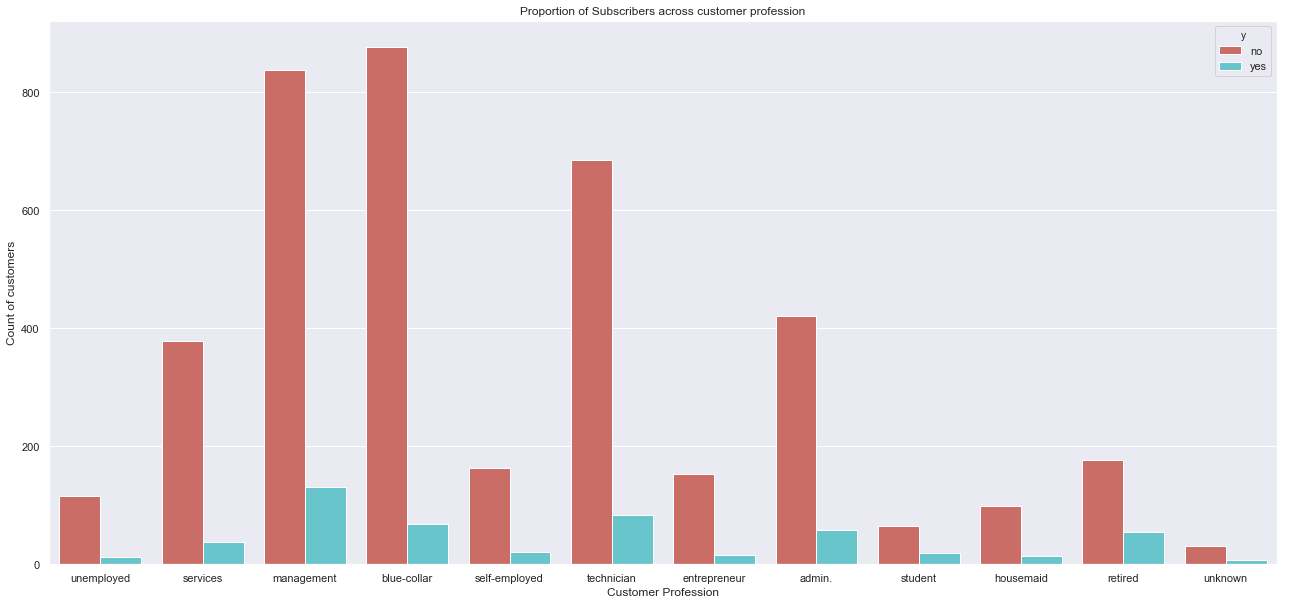

In [28]:
sns.set(rc={'figure.figsize':(22,10)})
fig, ax = plt.subplots()
ax = sns.countplot(x='job', hue='y', palette='hls', data=data_original)
ax.set(xlabel='Customer Profession', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across customer profession')

**Customers in management, blue-collar and technician jobs comprise over 50% of all customers. <br/>The proportion of subscribers is pretty much equal across customers of all job type.** 

##### 4. Visualizing 'Mode of Last Contact'

[Text(0.5, 1.0, 'Proportion of Subscribers across Mode of Last Contact')]

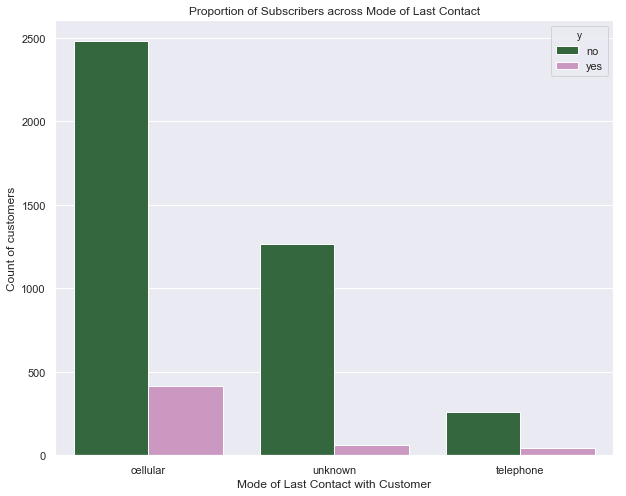

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='contact', hue='y', palette='cubehelix', data=data_original)
ax.set(xlabel='Mode of Last Contact with Customer', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across Mode of Last Contact')

**Though most contacts were made on the cellular device, the proportion of Subscribers remains constant across different category of customers.**

##### 5. Visualizing 'Outcome of Campaign'

[Text(0.5, 1.0, 'Relationship between Subscription and Outcome of Campaign')]

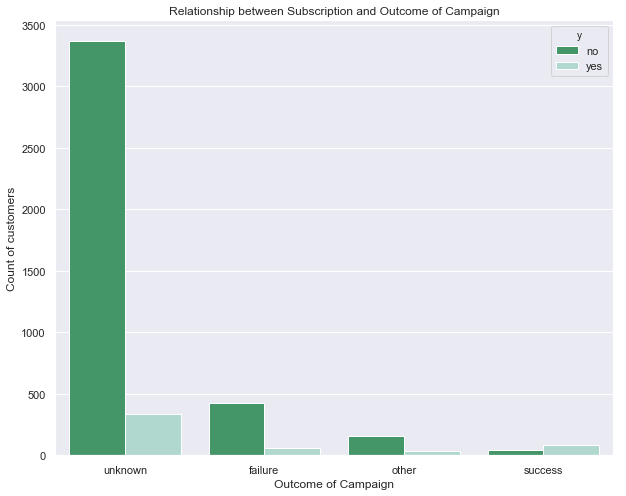

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='poutcome', hue='y', palette='BuGn_r', data=data_original)
ax.set(xlabel='Outcome of Campaign', ylabel='Count of customers')
ax.set(title='Relationship between Subscription and Outcome of Campaign')

**In agreement to our intuition, Proportion of Subscribers is GREATER THAN that of non-subscribers for those customers, for whom campaign outcome was a success. <br/>
However, prima facie, customers for whom campaign outcome was UNKNOWN behave quite similar to customers for whom the campaign FAILED.**

##### 6. Visualizing 'Housing Loan'

[Text(0.5, 1.0, 'Proportion of Subscribers among customers with/out Housing Loan')]

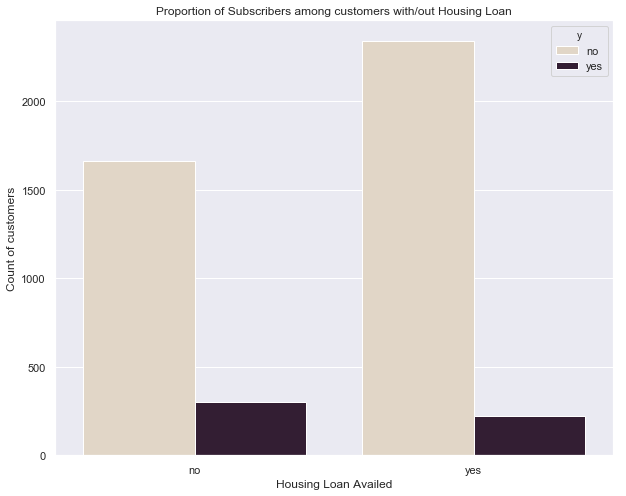

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='housing', hue='y', palette='ch:.25', data=data_original)
ax.set(xlabel='Housing Loan Availed', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers among customers with/out Housing Loan')

**There's a fair distribution of customers among those who have availed Housing loan and those who haven't. <br/>
The proportion of Subscribers among those who don't have a housing loan is GREATER THAN those who have a housing loan.**

##### 7. Visualizing 'Personal Loan'

[Text(0.5, 1.0, 'Proportion of Subscribers among customers with/out Housing Loan')]

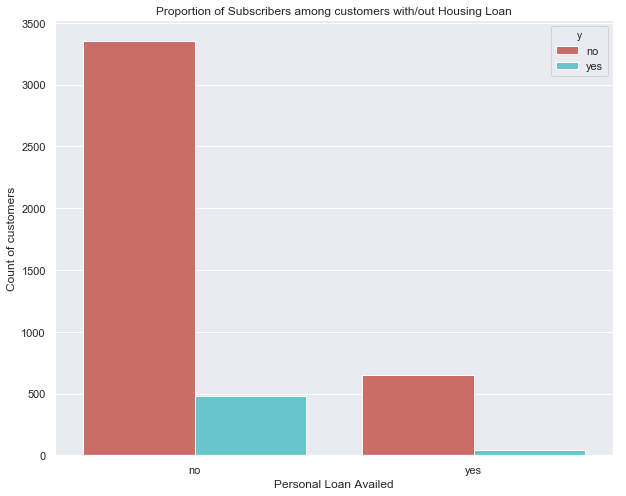

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='loan', hue='y', palette='hls', data=data_original)
ax.set(xlabel='Personal Loan Availed', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers among customers with/out Housing Loan')

**Bulk of our customers haven't availed of a personal loan. And the distribution of Subscribers is fairly same for the two categories of customers.**

### Visualize Relationship between features (both discrete and continuous)

##### 1. Relationship between Account Balance and Last Contact Duration (For Subscribers)

C:\Users\visha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


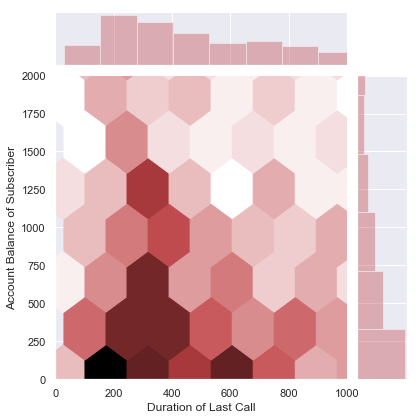

In [33]:
subscribers_zoomed_in_balance_data = zoomed_in_balance_data[zoomed_in_balance_data.y == 'yes']

sns.set(rc={'figure.figsize':(12,10)})
ax = (sns.jointplot(data=subscribers_zoomed_in_balance_data, x='duration', y='balance', kind='hex', color='r', xlim=(0,1000), ylim=(0,2000))
         .set_axis_labels('Duration of Last Call', 'Account Balance of Subscriber'))

**The bulk of the Subscribers lie in the region between Account Balance (0-1250 euros) and Last contact duration (200-600 seconds).**

##### 2. Relationship between Account Balance and Last Contact Duration (For Non-Subscribers)

C:\Users\visha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


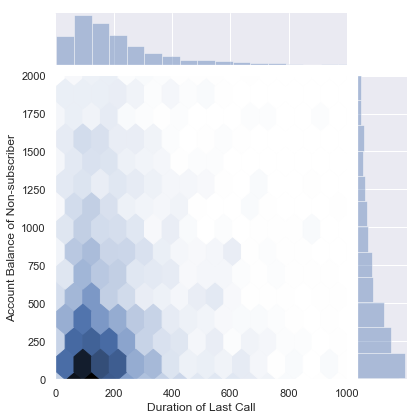

In [34]:
non_subscribers_zoomed_in_balance_data = zoomed_in_balance_data[zoomed_in_balance_data.y == 'no']

sns.set(rc={'figure.figsize':(12,10)})
ax = (sns.jointplot(data=non_subscribers_zoomed_in_balance_data, x='duration', y='balance', kind='hex', color='b', xlim=(0,1000), ylim=(0,2000))
         .set_axis_labels('Duration of Last Call', 'Account Balance of Non-subscriber'))

**The bulk of the Non-Subscribers lie in the region between Account Balance(0-500 euros) and Last contact duration(0-200 seconds).**

##### 3. Relationship between Mode of Last Contact and its Duration

[Text(0.5, 1.0, 'Relationship between Mode of Last Contact and its Duration')]

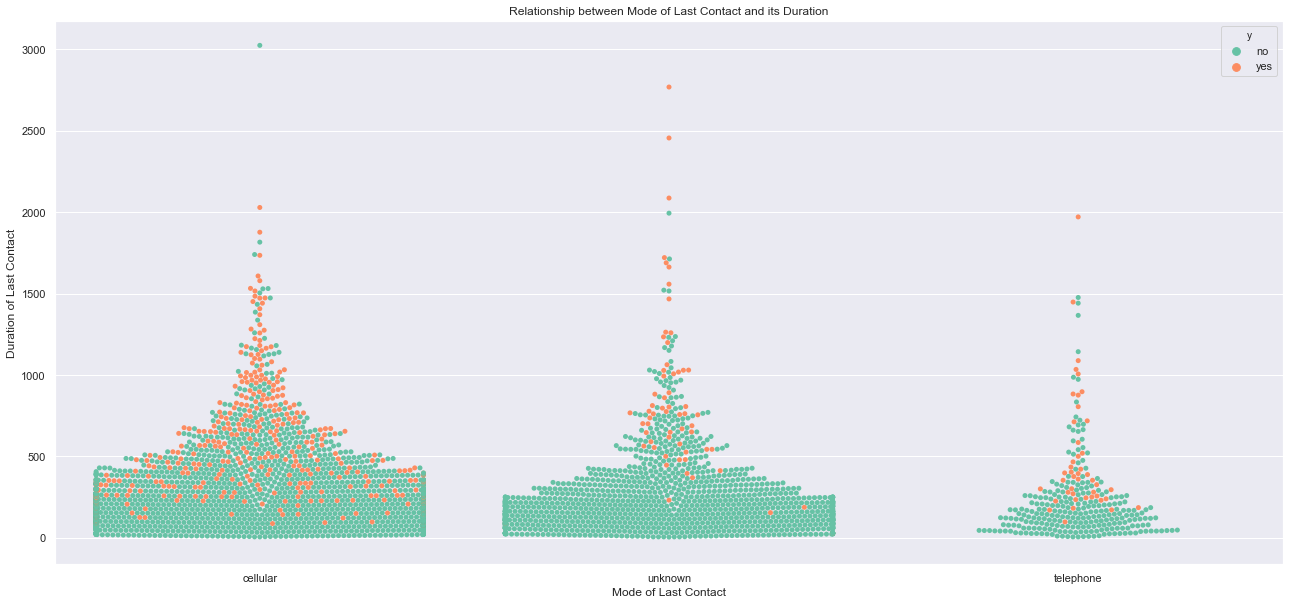

In [35]:
sns.set(rc={'figure.figsize':(22,10)})
ax = sns.swarmplot(x='contact', y='duration', hue='y', palette='Set2', data=data_original)
ax.set(xlabel='Mode of Last Contact', ylabel='Duration of Last Contact')
ax.set(title='Relationship between Mode of Last Contact and its Duration')

**We've seen earlier that higher the duration of last call better are the chances of customer subscribing. This is corroborated by the data here, for contact type 'Unknown'. <br/> However, one interesting point is that a sizeable chunk of subscribers of contact-type cellular have last call duration less than 500 seconds. <br/> MAYBE CONTACTING  CUSTOMER ON CELLULAR DEVICE IS A GOOD TACTIC FOR GREATER POSSIBILITY OF SUBSCRIPTION**

##### 4. Relationship between Last Contact Duration and Campaign Outcome

[Text(0.5, 1.0, 'Relationship between Last Call Duration and Outcome of Campaign')]

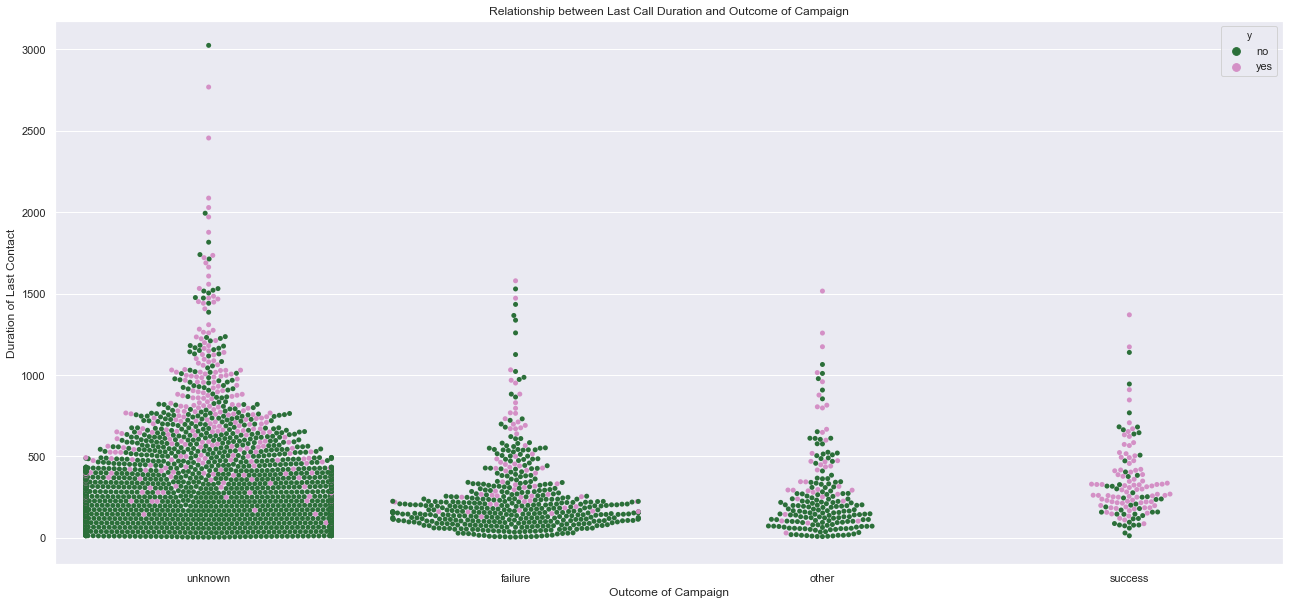

In [36]:
sns.set(rc={'figure.figsize':(22,10)})
ax = sns.swarmplot(x='poutcome', y='duration', hue='y', palette='cubehelix', data=data_original)
ax.set(xlabel='Outcome of Campaign', ylabel='Duration of Last Contact')
ax.set(title='Relationship between Last Call Duration and Outcome of Campaign')

**The bulk of Subscribers lie in the region of 'Unknown' campaign outcome. Most of these subscribers have their last contact duration over 500 seconds. <br/> However, though a tiny fraction of subscribers showed a successful campaign outcome, most of them had last contact duration well below 500 seconds. <br/> So, we would recommend that if the bank focuses on having MORE CUSTOMERS WITH SUCCESSFUL CAMPAIGN OUTCOMES it would need lesser time to sell LONG-TERM DEPOSIT SUBSCRIPTIONS to these customers.**

##### 5. Distribution of Last Call Duration Across Subscribers with/out Housing Loan

[Text(0.5, 1.0, 'Distribution of Last Call Duration Across Subscribers with/out Housing Loan')]

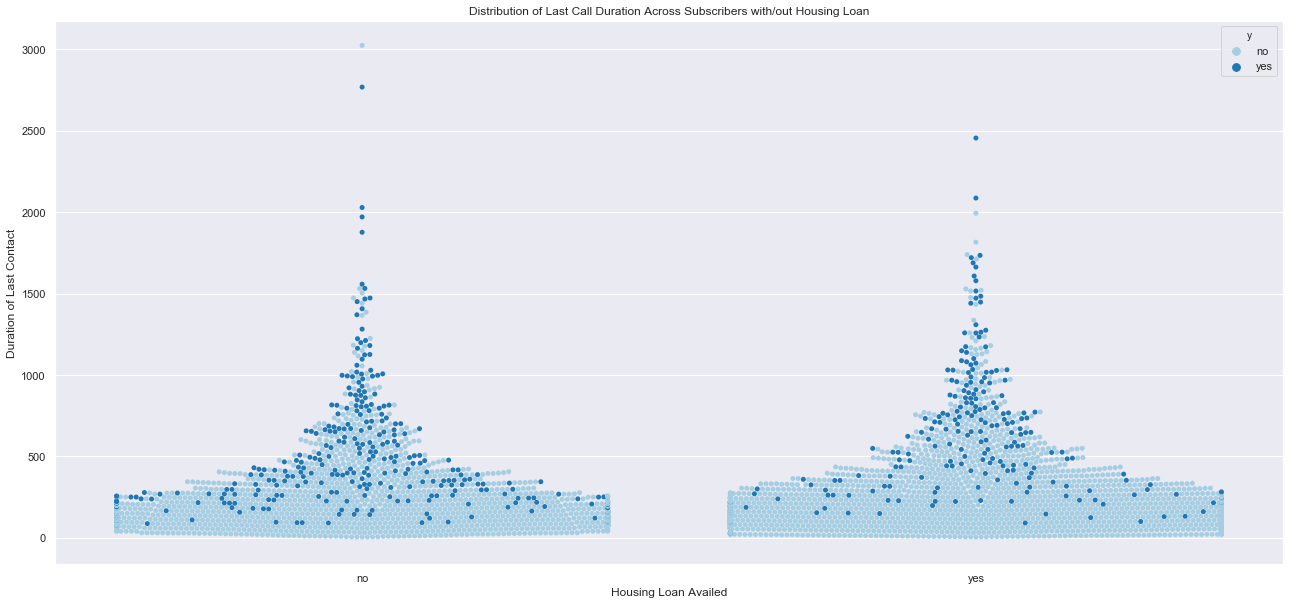

In [37]:
sns.set(rc={'figure.figsize':(22,10)})
ax = sns.swarmplot(x='housing', y='duration', hue='y', palette='Paired', data=data_original)
ax.set(xlabel='Housing Loan Availed', ylabel='Duration of Last Contact')
ax.set(title='Distribution of Last Call Duration Across Subscribers with/out Housing Loan')

**There is no visible difference between the distribution of last contact duration for the two categories.**

##### 6. Distribution of Account Balance across customers of different profession

[Text(0.5, 1.0, 'Relationship between Customer Account Balance and Campaign Outcome')]

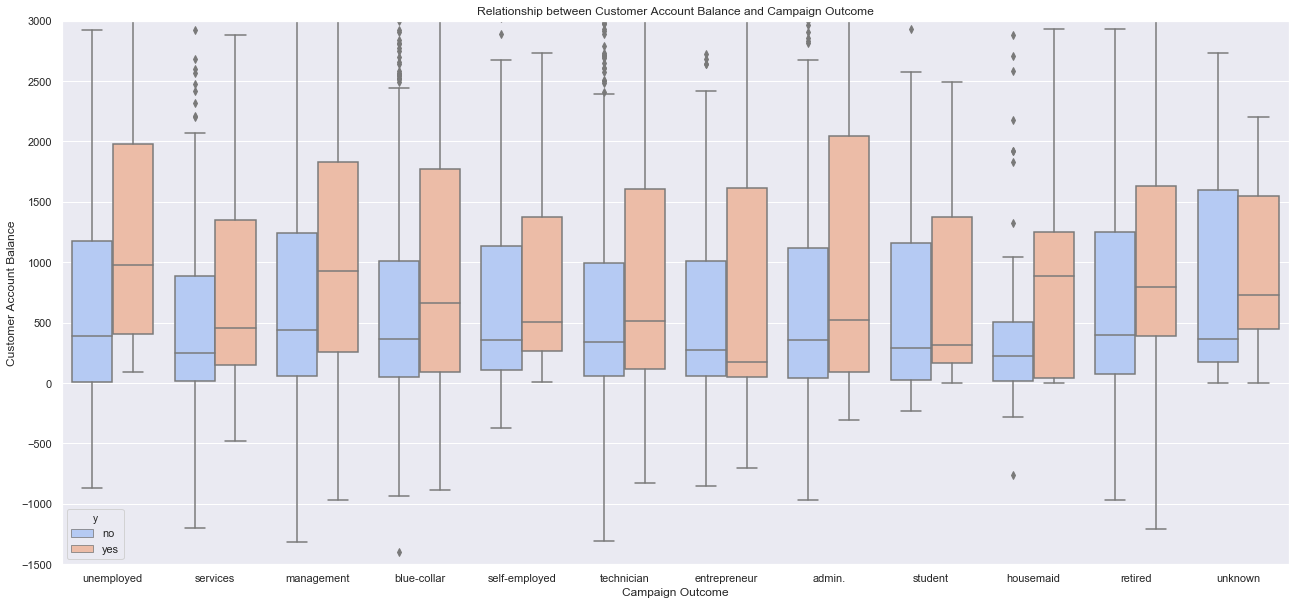

In [38]:
sns.set(rc={'figure.figsize':(22,10)})
ax = sns.boxplot(x='job', y='balance', hue='y', palette='coolwarm', data=zoomed_in_balance_data)
ax.set(xlabel='Campaign Outcome', ylabel='Customer Account Balance')
ax.set_ylim([-1500, 3000])
ax.set(title='Relationship between Customer Account Balance and Campaign Outcome')

**Among customers from all professions (except Entrepreneurs), subscribers have larger account balance than non-subscribers. <br/> This corroborates our earlier hypothesis that Subscribers tend to have larger account balance than Non-subscribers.** 

##### 7. Distribution of Account Balance Across Subscribers with/out Housing Loan

[Text(0.5, 1.0, 'Distribution of Account Balance Across Subscribers with/out Housing Loan')]

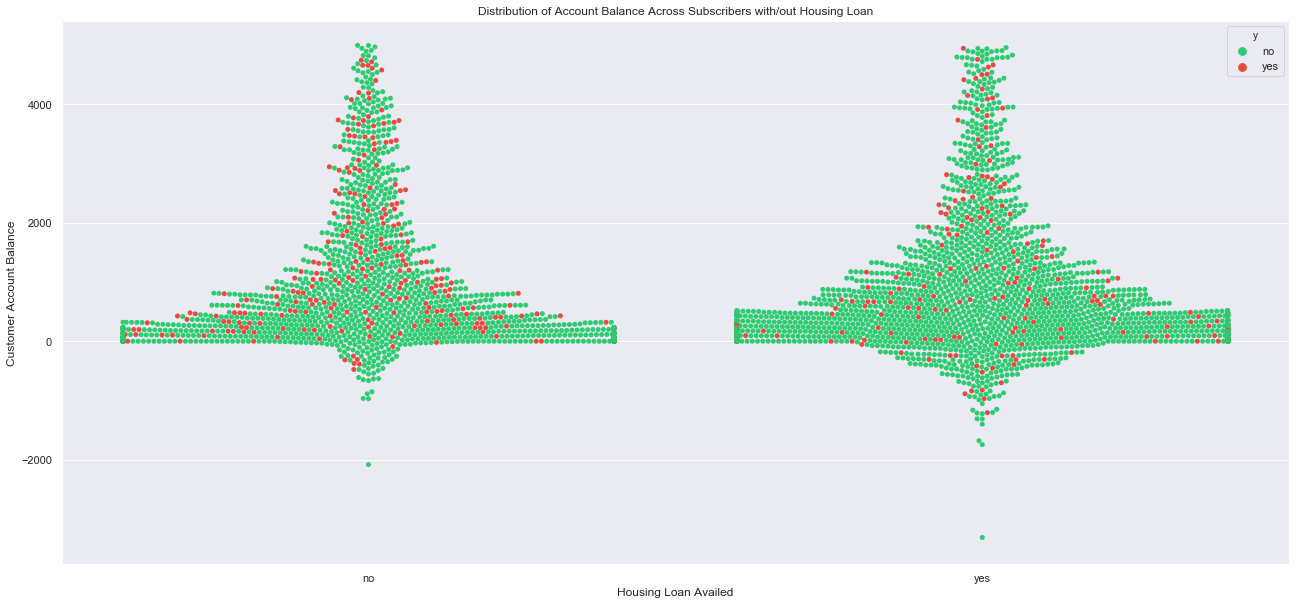

In [39]:
sns.set(rc={'figure.figsize':(22,10)})
color = ['#2ecc71', '#e74c3c']
ax = sns.swarmplot(x='housing', y='balance', hue='y', palette=color, data=zoomed_in_balance_data)
ax.set(xlabel='Housing Loan Availed', ylabel='Customer Account Balance')
ax.set(title='Distribution of Account Balance Across Subscribers with/out Housing Loan')

**We see here that among all Subscribers a greater percentage haven't taken a housing loan. <br/> But subscribers with negative account balance is higher among those who have taken housing loan.**

In our analysis so far, we didn't include **'default'** because over 98% of all 'default' values is 'no'. So this feature is redundant in our analysis. Also, features **'pdays'** and **'previous'** take a single value for a large bulk of the observations and are strongly correlated to feature 'poutcome'. So, we didn't use 'pdays' and 'previous' in most of our analysis.

**Finally, after having completed our Exploratory Data Analysis, we conclude that all features except 'default' could be used to train our Classification Models.**